<a href="https://colab.research.google.com/github/Samarth-Kanodia/Samarth-Kanodia-DAI-101_Assignment-2/blob/main/Samarth_Kanodia_23117126_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DAI-101 Assignment-02



Objective:

Find some imbalanced dataset with fewer classes and  to apply oversampling or undersampling techniques (random over and undersampling, tomek link, SMOTE and class weighing).

Train the model on balanced dataset and find the performance matrices (Accuracy, F1 score and AUC) and compare which technique is improving model performance.  

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [4]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN

In [5]:
from sklearn.utils.class_weight import compute_class_weight

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [8]:
from tabulate import tabulate

In [9]:
# read the file using pandas
df = pd.read_csv('weatherAUS.csv')

###Data Preprocessing

In [10]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [12]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [13]:
df.dtypes

,0
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.size

3345580

In [16]:
df.shape

(145460, 23)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [18]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,2013-04-04 21:08:51.907053568,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,2011-01-11 00:00:00,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,2013-06-02 00:00:00,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,2015-06-14 00:00:00,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000
std,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665


In [19]:
df.nunique().values

array([3436,   49,  389,  505,  681,  358,  145,   16,   67,   16,   16,
         43,   44,  101,  101,  546,  549,   10,   10,  441,  502,    2,
          2])

In [20]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [21]:
# dealing with missing values

# dropping missing values of the column RainToday and RainTomorrow
df.dropna(subset = ['RainToday', 'RainTomorrow'], inplace = True)

# filling missing values of categorical columns with 'Unknown'
df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']] = df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']].fillna('Unknown')

# imputing missing values of numerical columns using the mean of corresponding column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']] = imputer.fit_transform(df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']])

In [22]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [24]:
df['Location'].nunique()

49

In [25]:
df['WindGustDir'].nunique()

17

In [26]:
df['WindDir9am'].nunique()

17

In [27]:
df['WindDir3pm'].nunique()

17

In [28]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [29]:
one_hot_enc = pd.get_dummies(df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']], dtype = int)
print(one_hot_enc)

        Location_Adelaide  Location_Albany  Location_Albury  \
0                       0                0                1   
1                       0                0                1   
2                       0                0                1   
3                       0                0                1   
4                       0                0                1   
...                   ...              ...              ...   
145454                  0                0                0   
145455                  0                0                0   
145456                  0                0                0   
145457                  0                0                0   
145458                  0                0                0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
0                           0                       0                  0   
1                           0                       0                  0   
2              

In [30]:
df = df.drop(columns = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df = pd.concat([one_hot_enc, df], axis = 1)

In [31]:
df.sample()

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
108266,0,0,0,0,0,0,0,0,0,0,...,59.0,35.0,1018.5,1017.9,5.0,4.49925,12.6,16.3,0,0


In [32]:
print(df.columns)

Index(['Location_Adelaide', 'Location_Albany', 'Location_Albury',
       'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat',
       'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra',
       ...
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object', length=118)


In [33]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
print(y_train)

[0 0 0 ... 1 1 0]


###Exploratory Data Analysis

In [36]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [37]:
X_train.dtypes

,0
0,float64
1,float64
2,float64
3,float64
4,float64
...,...
112,float64
113,float64
114,float64
115,float64


In [38]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,66.0,49.0,1022.7,1018.1,4.431161,4.49925,18.2,22.3,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,68.0,57.0,1012.1,1007.9,4.000000,2.00000,29.3,32.2,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,62.0,60.0,1018.7,1016.5,4.431161,4.49925,19.2,22.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,83.0,73.0,1016.9,1018.9,8.000000,7.00000,15.3,16.3,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,96.0,66.0,1025.5,1023.6,6.000000,4.49925,7.9,14.2,0.0


<Axes: ylabel='count'>

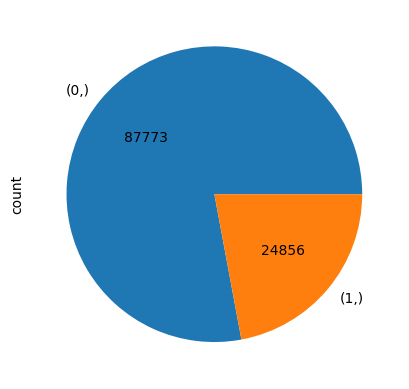

In [39]:
y_train.value_counts().plot(kind = 'pie', autopct = lambda x: '{:.0f}'.format(x*y_train.value_counts().sum()/100))

In [40]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
accuracy_imbalanced = accuracy_score(y_test, y_pred, normalize = True)
roc_imbalanced = roc_auc_score(y_test, y_pred, average = 'macro')
f1_imbalanced = f1_score(y_test, y_pred, average = 'binary')
print(accuracy_imbalanced)
print(roc_imbalanced)
print(f1_imbalanced)

0.8374529441011436
0.703863811666303
0.5608749880072915


In [43]:
0# random under-sampling
rus = RandomUnderSampler(random_state = 0)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

<Axes: ylabel='count'>

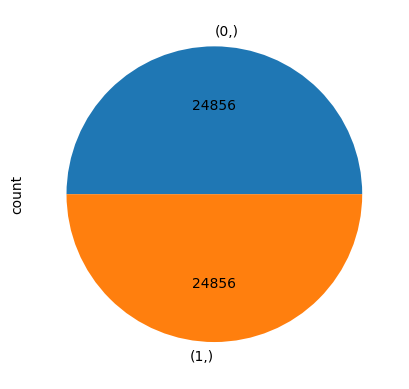

In [44]:
y_rus.value_counts().plot(kind = 'pie', autopct = lambda x: '{:.0f}'.format(x*y_rus.value_counts().sum()/100))

In [45]:
classifier = LogisticRegression()
classifier.fit(X_rus, y_rus)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred = classifier.predict(X_test)

In [47]:
accuracy_rus = accuracy_score(y_test, y_pred, normalize = True)
roc_rus = roc_auc_score(y_test, y_pred, average = 'macro')
f1_rus = f1_score(y_test, y_pred, average = 'binary')
print(accuracy_rus)
print(roc_rus)
print(f1_rus)

0.788372753746715
0.780313440084258
0.6198405103668262


In [48]:
# tomek links
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train)

<Axes: ylabel='count'>

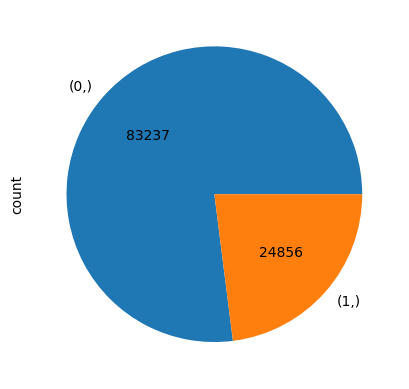

In [49]:
y_tl.value_counts().plot(kind = 'pie', autopct = lambda x: '{:.0f}'.format(x*y_tl.value_counts().sum()/100))

In [50]:
classifier = LogisticRegression()
classifier.fit(X_tl, y_tl)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
accuracy_tl = accuracy_score(y_test, y_pred, normalize = True)
roc_tl = roc_auc_score(y_test, y_pred, average = 'macro')
f1_tl = f1_score(y_test, y_pred, average = 'binary')
print(accuracy_tl)
print(roc_tl)
print(f1_tl)

0.8379856523900845
0.7156071828682637
0.5782174556213018


In [53]:
# random over-sampling
ros = RandomOverSampler(random_state = 0)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

<Axes: ylabel='count'>

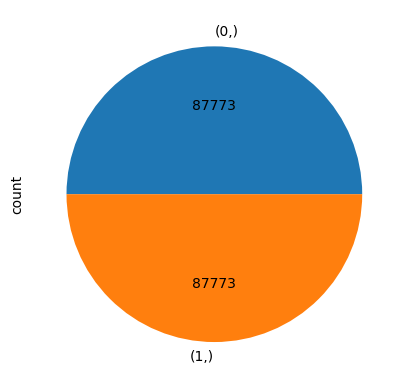

In [54]:
y_ros.value_counts().plot(kind = 'pie', autopct = lambda x: '{:.0f}'.format(x*y_ros.value_counts().sum()/100))

In [55]:
classifier = LogisticRegression()
classifier.fit(X_ros, y_ros)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
y_pred = classifier.predict(X_test)

In [57]:
accuracy_ros = accuracy_score(y_test, y_pred, normalize = True)
roc_ros = roc_auc_score(y_test, y_pred, average = 'macro')
f1_ros = f1_score(y_test, y_pred, average = 'binary')
print(accuracy_ros)
print(roc_ros)
print(f1_ros)

0.7857802400738689
0.7787518861970854
0.617064499746064


In [58]:
# SMOTE(Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state = 0)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

<Axes: ylabel='count'>

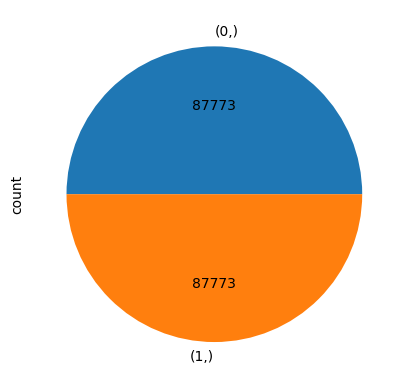

In [59]:
y_smote.value_counts().plot(kind = 'pie', autopct = lambda x: '{:.0f}'.format(x*y_smote.value_counts().sum()/100))

In [60]:
classifier = LogisticRegression()
classifier.fit(X_smote, y_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
y_pred = classifier.predict(X_test)

In [62]:
accuracy_smote = accuracy_score(y_test, y_pred, normalize = True)
roc_smote = roc_auc_score(y_test, y_pred, average = 'macro')
f1_smote = f1_score(y_test, y_pred, average = 'binary')
print(accuracy_smote)
print(roc_smote)
print(f1_smote)

0.7830101569713758
0.7752875586911702
0.6125554850982878


In [63]:
# class weights
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)
class_weights_dict = dict(enumerate(class_weights))
class_weights

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.64159252, 2.26563003])

In [64]:
classifier = LogisticRegression(class_weight = class_weights_dict)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.6415925170610552, 1: 2.265630028966849})

In [65]:
y_pred = classifier.predict(X_test)

In [66]:
accuracy_cw = accuracy_score(y_test, y_pred, normalize = True)
roc_cw = roc_auc_score(y_test, y_pred, average = 'macro')
f1_cw = f1_score(y_test, y_pred, average = 'binary')
print(accuracy_cw)
print(roc_cw)
print(f1_cw)

0.7836138930321755
0.7757331146683192
0.6132656299587432


In [71]:
data = {
    'Model': ['Imbalanced', 'Random Under Sampling', 'Tomek Links', 'Random Over Sampling', 'SMOTE', 'Class Weights'],
    'Accuracy': [
        accuracy_imbalanced,
        accuracy_rus,
        accuracy_tl,
        accuracy_ros,
        accuracy_smote,
        accuracy_cw
    ]
}

In [72]:
data = pd.DataFrame(data)

In [73]:
print("Accuracies: ")
print(tabulate(data, headers = 'keys', tablefmt = 'grid'))

Accuracies: 
+----+-----------------------+------------+
|    | Model                 |   Accuracy |
+====+=======================+============+
|  0 | Imbalanced            |   0.837453 |
+----+-----------------------+------------+
|  1 | Random Under Sampling |   0.788373 |
+----+-----------------------+------------+
|  2 | Tomek Links           |   0.837986 |
+----+-----------------------+------------+
|  3 | Random Over Sampling  |   0.78578  |
+----+-----------------------+------------+
|  4 | SMOTE                 |   0.78301  |
+----+-----------------------+------------+
|  5 | Class Weights         |   0.783614 |
+----+-----------------------+------------+
